In [1]:
import numpy as np
import pandas as pd
import patsy
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import metrics


from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.grid_search import GridSearchCV
from sklearn import preprocessing

from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier

from sklearn.cross_validation import cross_val_score, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import train_test_split

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.cross_validation import cross_val_predict

/Users/Marina/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/Marina/anaconda/lib/python2.7/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
df=pd.read_csv('/Users/Marina/Documents/GA Data Science/projects/projects-capstone/clean_data.csv')

In [3]:
df_male=df.loc[df['gender'] == "Male"]

In [4]:
df_male.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2732 entries, 65 to 5730
Data columns (total 81 columns):
iid         2732 non-null int64
id          2732 non-null float64
gender      2732 non-null object
idg         2732 non-null int64
condtn      2732 non-null int64
wave        2732 non-null int64
round       2732 non-null int64
position    2732 non-null int64
order       2732 non-null int64
partner     2732 non-null int64
pid         2732 non-null float64
match       2732 non-null int64
int_corr    2732 non-null float64
samerace    2732 non-null int64
age_o       2732 non-null float64
race_o      2732 non-null object
pf_o_att    2732 non-null float64
pf_o_sin    2732 non-null float64
pf_o_int    2732 non-null float64
pf_o_fun    2732 non-null float64
pf_o_amb    2732 non-null float64
pf_o_sha    2732 non-null float64
dec_o       2732 non-null int64
attr_o      2732 non-null float64
sinc_o      2732 non-null float64
intel_o     2732 non-null float64
fun_o       2732 non-null float6

In [5]:
df_m1=df_male.iloc[:,16:22]
df_m1.head()

,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha
65,15.0,20.0,20.0,15.0,15.0,15.0
66,45.0,5.0,25.0,20.0,0.0,5.0
67,35.0,10.0,35.0,10.0,10.0,0.0
68,20.0,20.0,20.0,20.0,10.0,10.0
69,20.0,5.0,25.0,25.0,10.0,15.0


In [6]:
df_m2=df_male.iloc[:,23:33]
df_m2.head()

,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age
65,6.0,9.0,7.0,7.0,6.0,5.0,7.0,6.0,2.0,27.0
66,5.0,7.0,8.0,4.0,6.0,3.0,6.0,4.0,2.0,27.0
67,7.0,9.0,10.0,7.0,8.0,9.0,8.0,7.0,1.0,27.0
68,4.0,10.0,8.0,5.0,8.0,7.0,6.0,7.0,2.0,27.0
69,5.0,8.0,8.0,2.0,2.0,2.0,7.0,5.0,2.0,27.0


In [7]:
df_m3=df_male.iloc[:,40:43]
df_m3.head()

,goal,date,go_out
65,1.0,5.0,4.0
66,1.0,5.0,4.0
67,1.0,5.0,4.0
68,1.0,5.0,4.0
69,1.0,5.0,4.0


In [8]:
df_m4=df_male.iloc[:,45:80]
df_m4.head()

,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,...,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1
65,8.0,7.0,2.0,6.0,7.0,5.0,5.0,5.0,4.0,9.0,...,5.0,20.0,20.0,25.0,5.0,8.0,9.0,7.0,8.0,5.0
66,8.0,7.0,2.0,6.0,7.0,5.0,5.0,5.0,4.0,9.0,...,5.0,20.0,20.0,25.0,5.0,8.0,9.0,7.0,8.0,5.0
67,8.0,7.0,2.0,6.0,7.0,5.0,5.0,5.0,4.0,9.0,...,5.0,20.0,20.0,25.0,5.0,8.0,9.0,7.0,8.0,5.0
68,8.0,7.0,2.0,6.0,7.0,5.0,5.0,5.0,4.0,9.0,...,5.0,20.0,20.0,25.0,5.0,8.0,9.0,7.0,8.0,5.0
69,8.0,7.0,2.0,6.0,7.0,5.0,5.0,5.0,4.0,9.0,...,5.0,20.0,20.0,25.0,5.0,8.0,9.0,7.0,8.0,5.0


In [9]:
df_male_cont=pd.concat([df_m1,df_m2,df_m3,df_m4, df_male['age_o'],df_male['imprace'],df_male['imprelig'],df_male['round'] ],axis=1)


In [10]:
from sklearn.preprocessing import StandardScaler
x=df_male_cont

X_norm =  StandardScaler().fit_transform(x);

df_stand=pd.DataFrame(X_norm, columns=df_male_cont.columns)
df_stand.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2732 entries, 0 to 2731
Data columns (total 58 columns):
pf_o_att    2732 non-null float64
pf_o_sin    2732 non-null float64
pf_o_int    2732 non-null float64
pf_o_fun    2732 non-null float64
pf_o_amb    2732 non-null float64
pf_o_sha    2732 non-null float64
attr_o      2732 non-null float64
sinc_o      2732 non-null float64
intel_o     2732 non-null float64
fun_o       2732 non-null float64
amb_o       2732 non-null float64
shar_o      2732 non-null float64
like_o      2732 non-null float64
prob_o      2732 non-null float64
met_o       2732 non-null float64
age         2732 non-null float64
goal        2732 non-null float64
date        2732 non-null float64
go_out      2732 non-null float64
sports      2732 non-null float64
tvsports    2732 non-null float64
exercise    2732 non-null float64
dining      2732 non-null float64
museums     2732 non-null float64
art         2732 non-null float64
hiking      2732 non-null float64
gaming   

In [11]:
X_male=df_stand


In [12]:
y_male = df_male.match

y_male = y_male.map(lambda x: 'no' if x ==0 else 'yes')

len(y_male)

2732

Random Forest Score:	0.827 ± 0.004
Ada Boost Score:	0.832 ± 0.002
Gradient Boosting Score:	0.842 ± 0.004
Decision Tree Score:	0.77 ± 0.013


,Gradient Boosting,Ada Boost,Random Forest,Decision Tree
like_o,0.077910,0.10,0.060591,0.114204
attr_o,0.061489,0.04,0.047407,0.038327
prob_o,0.058421,0.08,0.042846,0.055951
pf_o_att,0.048917,0.04,0.032078,0.058832
age_o,0.042486,0.06,0.032546,0.037665
shar_o,0.041916,0.02,0.044994,0.022146
pf_o_sin,0.038755,0.06,0.028043,0.023555
fun_o,0.037284,0.02,0.044070,0.040133
fun1_1,0.034848,0.02,0.015577,0.007847
pf_o_amb,0.034187,0.02,0.027548,0.030268


None


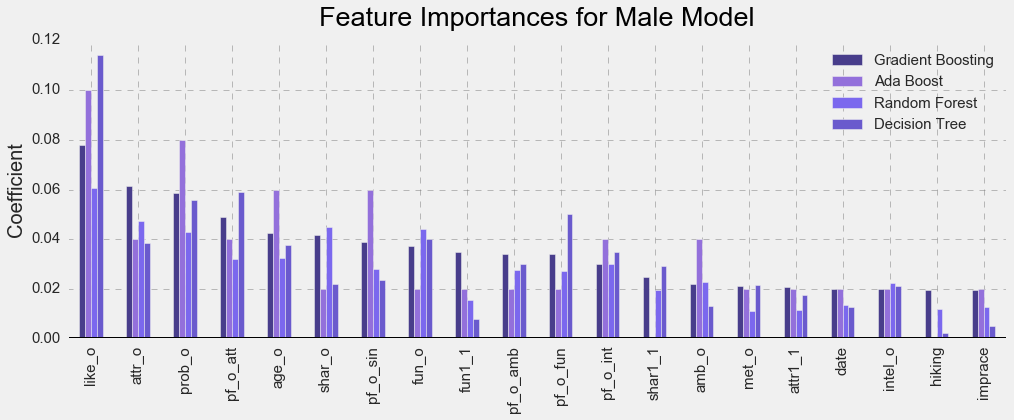

In [13]:
from sklearn.cross_validation import cross_val_score, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from IPython.display import display, HTML

plt.style.use('bmh')
plt.style.use('fivethirtyeight')
#plt.style.use('seaborn-deep')


rf = RandomForestClassifier()
abc = AdaBoostClassifier()
gbc = GradientBoostingClassifier()
dtc = DecisionTreeClassifier()

cv = StratifiedKFold(y_male, n_folds=5, shuffle=True, random_state=78)
def score(model, name):
    s = cross_val_score(model, X_male, y_male, cv=cv, n_jobs=-1)
    print "{} Score:\t{:0.3} ± {:0.3}".format(name, s.mean().round(3), s.std().round(3))

score(rf,"Random Forest")
score(abc, "Ada Boost")
score(gbc, "Gradient Boosting")
score(dtc, "Decision Tree")

rf.fit(X_male, y_male)
abc.fit(X_male, y_male)
gbc.fit(X_male, y_male)
dtc.fit(X_male, y_male)

importances = pd.DataFrame(zip(gbc.feature_importances_,
                               abc.feature_importances_,
                               rf.feature_importances_,
                               dtc.feature_importances_,
                              ),
                           index=X_male.columns,
                           columns=['Gradient Boosting',
                                    'Ada Boost',
                                    'Random Forest',
                                    'Decision Tree',
                                   ]).sort_values('Gradient Boosting',
                                                                  ascending=False)

print display(importances.head(30))

importances[0:20].plot(kind='bar', figsize=(15,5), color=['darkslateblue','mediumpurple','mediumslateblue','slateblue'])


plt.title('Feature Importances for Male Model', fontsize = 27, y = 1.03, color='black')
plt.grid(color='gray', linestyle='--', alpha=.5)

plt.ylabel('Coefficient', fontsize = 20)
plt.yticks(fontsize = 15)

#plt.xlabel('Features', fontsize = 30)
plt.axhline(0, color='black')
plt.xticks(rotation=90, fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

In [14]:
categ_male= ['position', 'samerace','race_o','condtn','dec', 'field_cd','race','wave','career_c','order']
df_male_cat=df_male[categ_male]

len(df_male_cat)

2732

In [15]:
X = patsy.dmatrix('~ C(samerace) + C(race_o) +C(field_cd)+ C(race)+C(career_c)+C(dec)+C(condtn)+C(position)+C(order)', df_male_cat)

df_cat=pd.DataFrame(X, columns=X.design_info.column_names)
df_cat
df_cat=pd.DataFrame(X, columns=X.design_info.column_names)
df_cat.head()

,Intercept,C(samerace)[T.1],C(race_o)[T.Asian American],C(race_o)[T.European American],C(race_o)[T.Hispanic American],C(race_o)[T.Other],C(field_cd)[T.Business/Econ/Finance],C(field_cd)[T.Education],C(field_cd)[T.Engineering],C(field_cd)[T.English],...,C(order)[T.13],C(order)[T.14],C(order)[T.15],C(order)[T.16],C(order)[T.17],C(order)[T.18],C(order)[T.19],C(order)[T.20],C(order)[T.21],C(order)[T.22]
0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
X_male=df_cat

Random Forest Score:	0.811 ± 0.003
Ada Boost Score:	0.822 ± 0.006
Gradient Boosting Score:	0.82 ± 0.008
Decision Tree Score:	0.786 ± 0.018


,Gradient Boosting,Ada Boost,Random Forest,Decision Tree
C(dec)[T.1],0.198701,0.02,0.204723,0.224782
C(career_c)[T.Entertainment],0.040351,0.00,0.012020,0.010724
C(position)[T.10],0.028476,0.02,0.016626,0.012387
C(race)[T.Other],0.027615,0.00,0.008382,0.009523
C(field_cd)[T.Business/Econ/Finance],0.021142,0.02,0.023462,0.021537
C(career_c)[T.Psychologist],0.020552,0.02,0.005065,0.000495
C(order)[T.20],0.020135,0.02,0.007572,0.003925
C(position)[T.6],0.019748,0.02,0.011480,0.007213
C(race_o)[T.Hispanic American],0.019498,0.02,0.010033,0.011321
C(race_o)[T.European American],0.019221,0.06,0.020476,0.028988


None


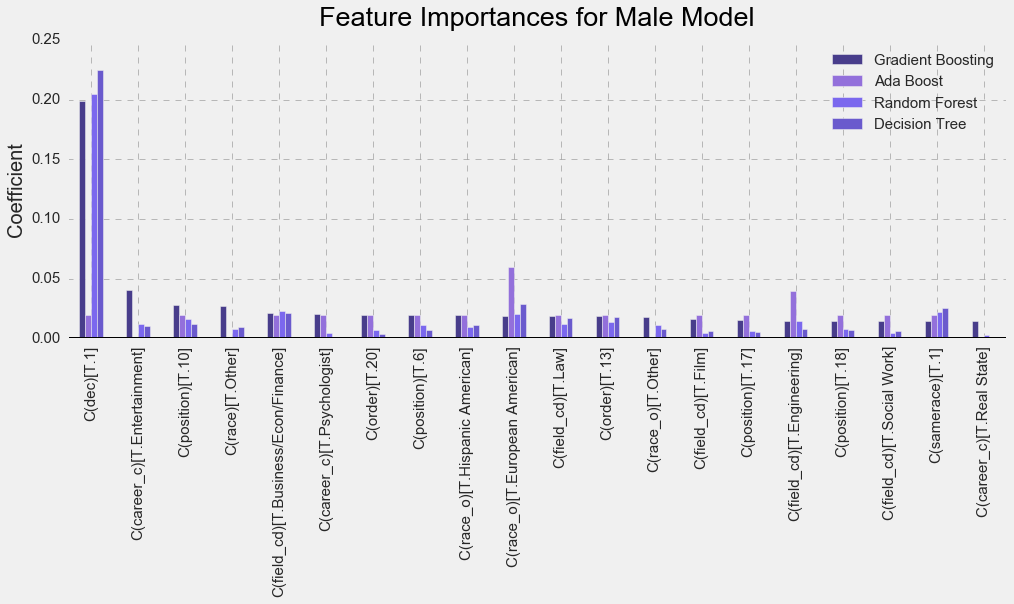

In [17]:
from sklearn.cross_validation import cross_val_score, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from IPython.display import display, HTML

plt.style.use('bmh')
plt.style.use('fivethirtyeight')
#plt.style.use('seaborn-deep')


rf = RandomForestClassifier()
abc = AdaBoostClassifier()
gbc = GradientBoostingClassifier()
dtc = DecisionTreeClassifier()

cv = StratifiedKFold(y_male, n_folds=5, shuffle=True, random_state=78)
def score(model, name):
    s = cross_val_score(model, X_male, y_male, cv=cv, n_jobs=-1)
    print "{} Score:\t{:0.3} ± {:0.3}".format(name, s.mean().round(3), s.std().round(3))

score(rf,"Random Forest")
score(abc, "Ada Boost")
score(gbc, "Gradient Boosting")
score(dtc, "Decision Tree")

rf.fit(X_male, y_male)
abc.fit(X_male, y_male)
gbc.fit(X_male, y_male)
dtc.fit(X_male, y_male)

importances = pd.DataFrame(zip(gbc.feature_importances_,
                               abc.feature_importances_,
                               rf.feature_importances_,
                               dtc.feature_importances_,
                              ),
                           index=X_male.columns,
                           columns=['Gradient Boosting',
                                    'Ada Boost',
                                    'Random Forest',
                                    'Decision Tree',
                                   ]).sort_values('Gradient Boosting',
                                                                  ascending=False)

print display(importances.head(30))

importances[0:20].plot(kind='bar', figsize=(15,5), color=['darkslateblue','mediumpurple','mediumslateblue','slateblue'])


plt.title('Feature Importances for Male Model', fontsize = 27, y = 1.03, color='black')
plt.grid(color='gray', linestyle='--', alpha=.5)

plt.ylabel('Coefficient', fontsize = 20)
plt.yticks(fontsize = 15)

#plt.xlabel('Features', fontsize = 30)
plt.axhline(0, color='black')
plt.xticks(rotation=90, fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

In [18]:
cont_male=['like_o', 'attr_o','prob_o','pf_o_att','age_o','shar_o','pf_o_sin','fun_o','fun1_1','pf_o_amb','pf_o_fun',\
          'pf_o_int','shar1_1','amb_o','met_o','attr1_1','intel_o','date','sinc_o','imprace','yoga','hiking','pf_o_sha',\
          'round','intel2_1','intel1_1','exphappy','gaming','fun2_1','movies']
df_male_cont=df_male[cont_male]
len(df_male_cont)

2732

In [19]:
from sklearn.preprocessing import StandardScaler
x=df_male_cont

X_norm =  StandardScaler().fit_transform(x);

df_stand=pd.DataFrame(X_norm, columns=df_male_cont.columns)
df_stand.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2732 entries, 0 to 2731
Data columns (total 30 columns):
like_o      2732 non-null float64
attr_o      2732 non-null float64
prob_o      2732 non-null float64
pf_o_att    2732 non-null float64
age_o       2732 non-null float64
shar_o      2732 non-null float64
pf_o_sin    2732 non-null float64
fun_o       2732 non-null float64
fun1_1      2732 non-null float64
pf_o_amb    2732 non-null float64
pf_o_fun    2732 non-null float64
pf_o_int    2732 non-null float64
shar1_1     2732 non-null float64
amb_o       2732 non-null float64
met_o       2732 non-null float64
attr1_1     2732 non-null float64
intel_o     2732 non-null float64
date        2732 non-null float64
sinc_o      2732 non-null float64
imprace     2732 non-null float64
yoga        2732 non-null float64
hiking      2732 non-null float64
pf_o_sha    2732 non-null float64
round       2732 non-null float64
intel2_1    2732 non-null float64
intel1_1    2732 non-null float64
exphappy 

In [20]:
categ_male= ['dec', 'race','career_c', 'field_cd','position']
df_male_cat=df_male[categ_male]

len(df_male_cat)


2732

In [21]:
X = patsy.dmatrix('~ C(race)+ C(field_cd)+C(dec)+C(career_c)+C(position)', df_male_cat)

df_cat=pd.DataFrame(X, columns=X.design_info.column_names)
df_cat.head()


,Intercept,C(race)[T.Asian American],C(race)[T.European American],C(race)[T.Hispanic American],C(race)[T.Other],C(field_cd)[T.Business/Econ/Finance],C(field_cd)[T.Education],C(field_cd)[T.Engineering],C(field_cd)[T.English],C(field_cd)[T.Film],...,C(position)[T.13],C(position)[T.14],C(position)[T.15],C(position)[T.16],C(position)[T.17],C(position)[T.18],C(position)[T.19],C(position)[T.20],C(position)[T.21],C(position)[T.22]
0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
df_male_final = pd.concat([df_cat, df_stand], axis=1)

X_male=df_male_final

len(X_male)

2732

In [23]:
y_male = df_male.match

y_male = y_male.map(lambda x: 'no' if x ==0 else 'yes')

len(y_male)

2732

Random Forest Score:	0.881 ± 0.004
Ada Boost Score:	0.895 ± 0.008
Gradient Boosting Score:	0.902 ± 0.007
Decision Tree Score:	0.857 ± 0.023


,Gradient Boosting,Ada Boost,Random Forest,Decision Tree
C(dec)[T.1],0.200214,0.02,0.167070,0.221267
attr_o,0.072026,0.06,0.063325,0.080464
like_o,0.058390,0.08,0.065774,0.189603
pf_o_int,0.050327,0.10,0.021251,0.035438
round,0.041314,0.02,0.018449,0.024118
pf_o_att,0.035652,0.06,0.017979,0.027205
prob_o,0.032315,0.04,0.042153,0.017558
shar_o,0.031599,0.06,0.052779,0.022253
fun_o,0.028191,0.04,0.032915,0.021888
fun1_1,0.028021,0.02,0.017428,0.017361


None


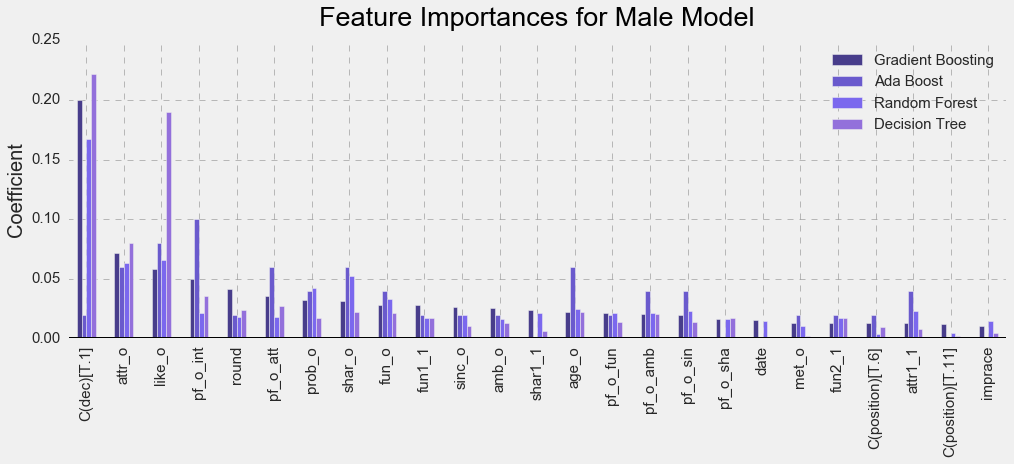

In [24]:
from sklearn.cross_validation import cross_val_score, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from IPython.display import display, HTML

plt.style.use('bmh')
plt.style.use('fivethirtyeight')
#plt.style.use('seaborn-deep')


rf = RandomForestClassifier(random_state=15)
abc = AdaBoostClassifier(random_state=15)
gbc = GradientBoostingClassifier(random_state=15)
dtc = DecisionTreeClassifier(random_state=15)

cv = StratifiedKFold(y_male, n_folds=5, shuffle=True, random_state=78)
def score(model, name):
    s = cross_val_score(model, X_male, y_male, cv=cv, n_jobs=-1)
    print "{} Score:\t{:0.3} ± {:0.3}".format(name, s.mean().round(3), s.std().round(3))

score(rf,"Random Forest")
score(abc, "Ada Boost")
score(gbc, "Gradient Boosting")
score(dtc, "Decision Tree")

rf.fit(X_male, y_male)
abc.fit(X_male, y_male)
gbc.fit(X_male, y_male)
dtc.fit(X_male, y_male)

importances = pd.DataFrame(zip(gbc.feature_importances_,
                               abc.feature_importances_,
                               rf.feature_importances_,
                               dtc.feature_importances_,
                              ),
                           index=X_male.columns,
                           columns=['Gradient Boosting',
                                    'Ada Boost',
                                    'Random Forest',
                                    'Decision Tree',
                                   ]).sort_values('Gradient Boosting',
                                                                  ascending=False)

print display(importances.head(40))

importances[0:25].plot(kind='bar', figsize=(15,5), color=['darkslateblue','slateblue','mediumslateblue','mediumpurple'])


plt.title('Feature Importances for Male Model', fontsize = 27, y = 1.03, color='black')
plt.grid(color='gray', linestyle='--', alpha=.5)

plt.ylabel('Coefficient', fontsize = 20)
plt.yticks(fontsize = 15)

#plt.xlabel('Features', fontsize = 30)
plt.axhline(0, color='black')
plt.xticks(rotation=90, fontsize = 15)
plt.legend(fontsize = 15)
plt.show()



In [26]:
df_round_date=pd.pivot_table(df_male, index=['match'], values=['round', 'date']).T
df_round_date.reset_index(inplace=True)
df_round_date

match,index,0,1
0,date,4.957409,4.531381
1,round,16.951642,16.596234
